<a href="https://colab.research.google.com/github/Basit-Aly/multi-algorithm-implementation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Algorithm Evaluation on UCI Classification Datasets**


## **Dataset 1 : Breast Cancer wisconsin Diagnostic**

**Application**:  
- Used for **binary classification** to diagnose breast tumors as **malignant (cancerous)** or **benign (non-cancerous)**.  
- Helps in **medical research** and **diagnostic decision-making** using machine learning.  

**Attributes**:  
- Contains **30 numeric features** derived from **digitized images** of fine needle aspirates (FNA) of breast masses.  
- Features describe **nuclei characteristics**, such as:  
  - Radius (mean distance from center to perimeter)  
  - Texture (standard deviation of gray-scale values)  
  - Smoothness, Compactness, Concavity, Symmetry, Fractal dimension (each with mean, standard error, and worst-case values).  
- **No missing values** in the dataset.  

**Number of Samples**:  
- **Total of 569 instances** (samples).  
- **212 malignant (37.3%)** and **357 benign (62.7%)** cases.  

**Number of Classes**:  
- **2 classes**:  
  - **Malignant (Class 0)** – Indicates cancerous tumors.  
  - **Benign (Class 1)** – Indicates non-cancerous tumors.  

**Additional Notes**:  
- Dataset is **clean, structured, and widely used** for benchmarking classification algorithms (e.g., SVM, logistic regression).  
- Originally sourced from the **University of Wisconsin Hospitals**.  
- Features are **real-valued**, normalized, and computed from medical imaging data.  

Step 1: Loading the Breast Cancer Wisconsin dataset
Dataset shape: (569, 30)
Number of features: 30
Number of classes: 2
Class distribution: [212 357]

Step 2: Data Preprocessing
Data has been scaled using StandardScaler

Step 3: Implementing 10×10 Fold Cross-Validation

Repeat 1/10
  Completed 10 folds for repeat 1

Repeat 2/10
  Completed 10 folds for repeat 2

Repeat 3/10
  Completed 10 folds for repeat 3

Repeat 4/10
  Completed 10 folds for repeat 4

Repeat 5/10
  Completed 10 folds for repeat 5

Repeat 6/10
  Completed 10 folds for repeat 6

Repeat 7/10
  Completed 10 folds for repeat 7

Repeat 8/10
  Completed 10 folds for repeat 8

Repeat 9/10
  Completed 10 folds for repeat 9

Repeat 10/10
  Completed 10 folds for repeat 10

Total execution time: 381.77 seconds

Final Results:
----------------------------------------------------------------------------------------------------
Algorithm                           Avg Accuracy    Avg F-Measure   Avg AUC        
------------------

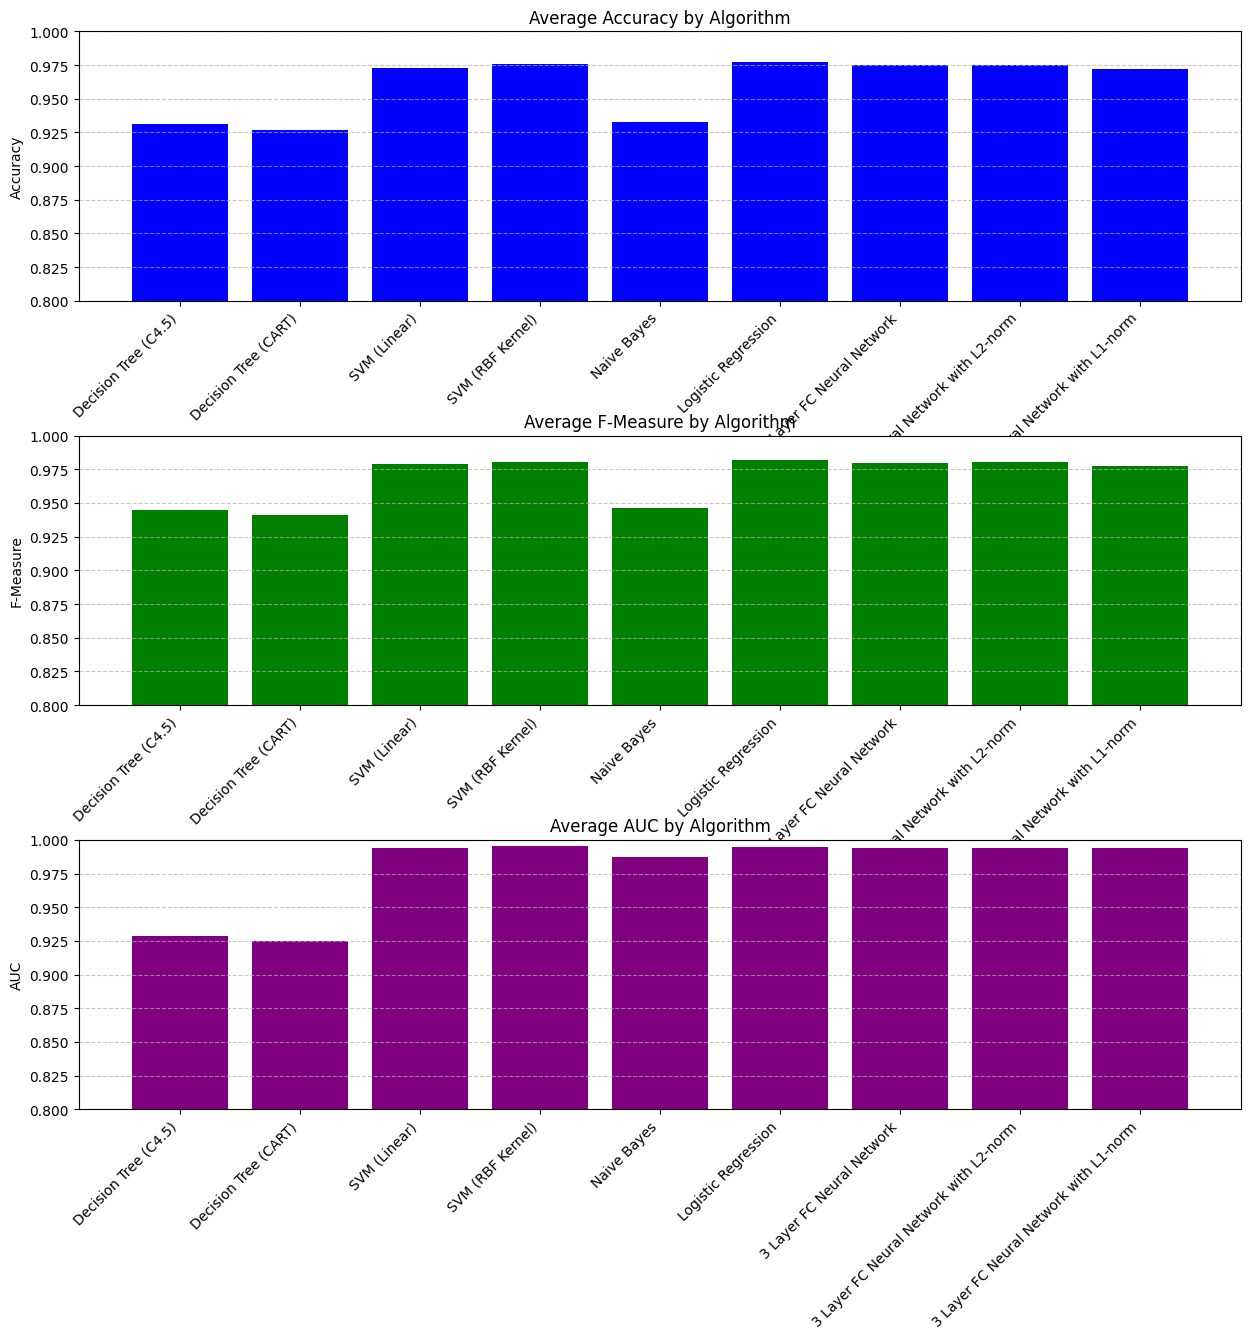

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
import time

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Load the Breast Cancer Wisconsin dataset
print("Step 1: Loading the Breast Cancer Wisconsin dataset")
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing")
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data has been scaled using StandardScaler")

# Step 3: Implementing 10×10 Fold Cross-Validation
print("\nStep 3: Implementing 10×10 Fold Cross-Validation")

# Define the models to evaluate
models = {
    'Decision Tree (C4.5)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Decision Tree (CART)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    '3 Layer FC Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.0001,
                                              random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L2-norm': MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01,
                                                          random_state=42, max_iter=1000),
    # For L1-norm, we need to use ElasticNet with l1_ratio=1.0 (pure L1)
    '3 Layer FC Neural Network with L1-norm': MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01,
                                                          solver='sgd', random_state=42, max_iter=1000,
                                                          nesterovs_momentum=False)  # Closest we can get to L1 in MLPClassifier
}

# Initialize results dictionary to store metrics
results = {model_name: {'accuracy': [], 'f1': [], 'auc': []} for model_name in models}

# Implement 10×10 Fold Cross-Validation
n_repeats = 10
n_splits = 10

start_time = time.time()

for repeat in range(n_repeats):
    print(f"\nRepeat {repeat+1}/{n_repeats}")

    # Create a new random split of the data
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

    for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
        print(f"  Processing fold {fold+1}/{n_splits}", end='\r')

        # Split data
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train and evaluate each model
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # For AUC, we need probability estimates
            if hasattr(model, "predict_proba"):
                try:
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                except:
                    # Fallback for models that might fail with predict_proba
                    y_pred_proba = y_pred
            else:
                # Some models might not have predict_proba
                try:
                    y_pred_proba = model.decision_function(X_test) if hasattr(model, "decision_function") else y_pred
                except:
                    y_pred_proba = y_pred

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            try:
                auc = roc_auc_score(y_test, y_pred_proba)
            except:
                auc = 0.5  # Default if AUC calculation fails

            # Store results
            results[model_name]['accuracy'].append(accuracy)
            results[model_name]['f1'].append(f1)
            results[model_name]['auc'].append(auc)

    print(f"  Completed {n_splits} folds for repeat {repeat+1}")

end_time = time.time()
print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

# Calculate average metrics across all 10×10 = 100 folds
print("\nFinal Results:")
print("-" * 100)
print(f"{'Algorithm':<35} {'Avg Accuracy':<15} {'Avg F-Measure':<15} {'Avg AUC':<15}")
print("-" * 100)

for model_name in models:
    avg_accuracy = np.mean(results[model_name]['accuracy'])
    avg_f1 = np.mean(results[model_name]['f1'])
    avg_auc = np.mean(results[model_name]['auc'])

    print(f"{model_name:<35} {avg_accuracy:.4f}        {avg_f1:.4f}        {avg_auc:.4f}")

print("-" * 100)


# Create a pandas DataFrame for better visualization
results_df = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'Average Accuracy': [np.mean(results[model_name]['accuracy']) for model_name in models],
    'Average F-Measure': [np.mean(results[model_name]['f1']) for model_name in models],
    'Average AUC': [np.mean(results[model_name]['auc']) for model_name in models]
})

# Create a taller figure with 3 subplots
plt.figure(figsize=(15, 14))  # Increased height to give space between plots

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.bar(results_df['Algorithm'], results_df['Average Accuracy'], color='blue')
plt.title('Average Accuracy by Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot F-Measure
plt.subplot(3, 1, 2)
plt.bar(results_df['Algorithm'], results_df['Average F-Measure'], color='green')
plt.title('Average F-Measure by Algorithm')
plt.ylabel('F-Measure')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot AUC
plt.subplot(3, 1, 3)
plt.bar(results_df['Algorithm'], results_df['Average AUC'], color='purple')
plt.title('Average AUC by Algorithm')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add space between subplots
plt.subplots_adjust(hspace=0.5)

# Show the final plots
plt.show()


## **Dataset 2: Mushroom**

**Application**:  
- Used for **binary classification** to determine if mushrooms are **edible (safe to eat)** or **poisonous (toxic)**.  
- Helps in **mycology research** and **food safety assessment** using machine learning.  

**Attributes**:  
- Contains **22 categorical features** describing physical characteristics of mushrooms, such as:  
  - Cap shape (e.g., bell, conical)  
  - Cap color (e.g., brown, yellow)  
  - Odor (e.g., almond, pungent)  
  - Gill size, Gill spacing, Stalk shape  
  - Habitat (e.g., woods, grasses)  
- **Missing values** are present (denoted as "?"), primarily in the `stalk-root` attribute.  

**Number of Samples**:  
- **Total of 8,124 instances** (samples).  
- **4,208 edible (51.8%)** and **3,916 poisonous (48.2%)** cases.  

**Number of Classes**:  
- **2 classes**:  
  - **Edible (Class "e")** – Safe for consumption.  
  - **Poisonous (Class "p")** – Toxic and harmful.  

**Additional Notes**:  
- Dataset is **categorical (non-numeric)**, requiring encoding (e.g., Label/One-Hot Encoding) for ML models.  
- Originally sourced from **The Audubon Society Field Guide to North American Mushrooms**.  
- Useful for testing **decision trees**, **rule-based systems**, and **feature importance analysis**.  

Step 1: Loading the Mushroom dataset from UCI
Dataset loaded successfully from URL.
Dataset shape: (8124, 23)
Number of features: 22
Number of samples: 8124
Number of classes: 2
Class distribution:
class
e    4208
p    3916
Name: count, dtype: int64
Encoded classes: ['e' 'p'] -> [0 1]

Step 2: Data Preprocessing
Missing values in dataset: 0
Number of '?' values in dataset: 2480
Dropped 2480 rows with missing values.
Shape after one-hot encoding: (5644, 98)
Data has been preprocessed and encoded.

Step 3: Implementing 10×10 Fold Cross-Validation

Repeat 1/10
  Completed 10 folds for repeat 1

Repeat 2/10
  Completed 10 folds for repeat 2

Repeat 3/10
  Completed 10 folds for repeat 3

Repeat 4/10
  Completed 10 folds for repeat 4

Repeat 5/10
  Completed 10 folds for repeat 5

Repeat 6/10
  Completed 10 folds for repeat 6

Repeat 7/10
  Completed 10 folds for repeat 7

Repeat 8/10
  Completed 10 folds for repeat 8

Repeat 9/10
  Completed 10 folds for repeat 9

Repeat 10/10
  Completed 

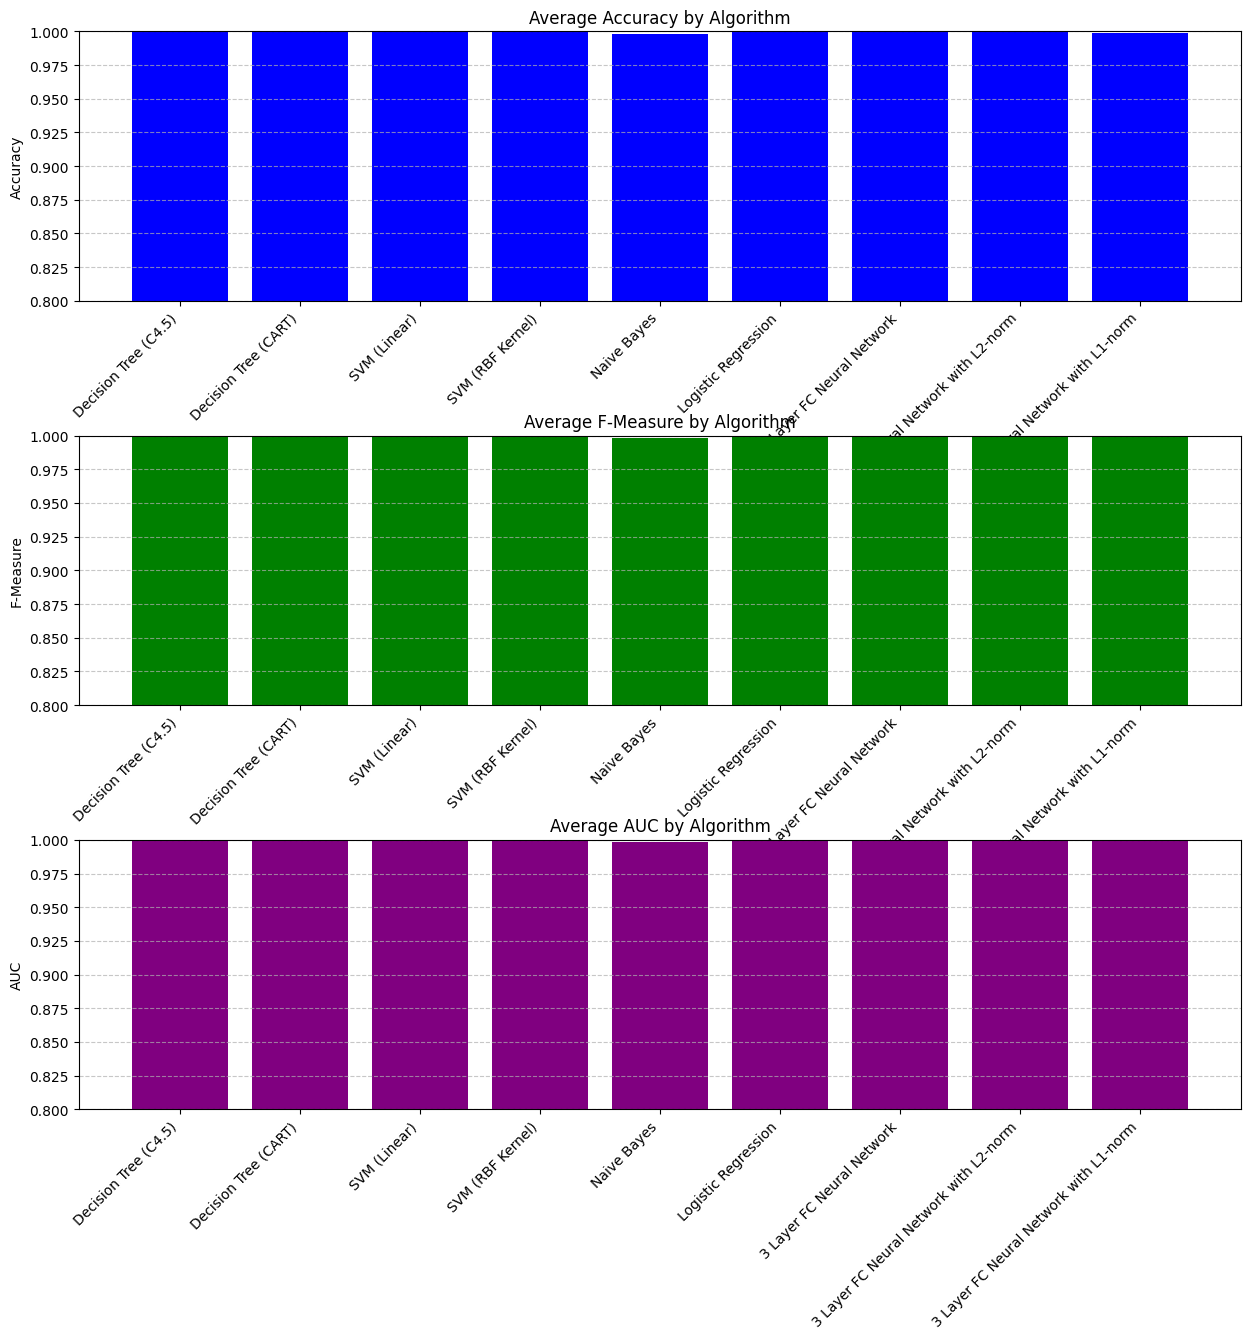

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
import time

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Load the Mushroom dataset
print("Step 1: Loading the Mushroom dataset from UCI")
# URL for the UCI Mushroom dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Column names according to UCI documentation
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color',
    'population', 'habitat'
]

try:
    # Try to load the dataset
    data = pd.read_csv(url, names=column_names)
    print("Dataset loaded successfully from URL.")
except Exception as e:
    print(f"Error loading from URL: {e}")
    print("Loading from alternate local path...")
    # Alternate approach: If URL fails, try a local file
    # Note: You may need to download the dataset first if this is used
    try:
        data = pd.read_csv('agaricus-lepiota.data', names=column_names)
        print("Dataset loaded successfully from local file.")
    except:
        print("Error: Unable to load the dataset. Please download it manually.")
        print("Dataset: https://archive.ics.uci.edu/ml/datasets/Mushroom")
        raise

# Display dataset information
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {len(data.columns) - 1}")  # -1 for the target class
print(f"Number of samples: {len(data)}")
print(f"Number of classes: {len(data['class'].unique())}")
print("Class distribution:")
print(data['class'].value_counts())

# Extract features and target
X = data.drop('class', axis=1)
y = data['class']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(f"Encoded classes: {label_encoder.classes_} -> {np.unique(y)}")

# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing")

# Check for missing values
missing_values = X.isnull().sum().sum()
print(f"Missing values in dataset: {missing_values}")

# Check for '?' which is used as missing value indicator in some UCI datasets
question_marks = (X == '?').sum().sum()
print(f"Number of '?' values in dataset: {question_marks}")

# Handle '?' values if they exist
if question_marks > 0:
    # Replace '?' with NaN
    X = X.replace('?', np.nan)
    # For this example, we'll drop rows with missing values
    # Alternative approaches include imputation
    rows_before = len(X)
    X = X.dropna()
    y = y[X.index]
    rows_after = len(X)
    print(f"Dropped {rows_before - rows_after} rows with missing values.")

# One-hot encode categorical features
categorical_features = X.columns  # All features are categorical in mushroom dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_encoded = preprocessor.fit_transform(X)

# If X_encoded is a sparse matrix, convert to dense array for some algorithms
if hasattr(X_encoded, "toarray"):
    X_processed = X_encoded.toarray()
else:
    X_processed = X_encoded

print(f"Shape after one-hot encoding: {X_processed.shape}")
print("Data has been preprocessed and encoded.")

# Step 3: Implementing 10×10 Fold Cross-Validation
print("\nStep 3: Implementing 10×10 Fold Cross-Validation")

# Define the models to evaluate
models = {
    'Decision Tree (C4.5)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Decision Tree (CART)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    '3 Layer FC Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50),
                                               random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L2-norm': MLPClassifier(hidden_layer_sizes=(100, 50),
                                                           alpha=0.01, random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L1-norm': MLPClassifier(hidden_layer_sizes=(100, 50),
                                                           alpha=0.01, solver='sgd',
                                                           nesterovs_momentum=False, random_state=42, max_iter=1000)
}

# Initialize results dictionary to store metrics
results = {model_name: {'accuracy': [], 'f1': [], 'auc': []} for model_name in models}

# Implement 10×10 Fold Cross-Validation
n_repeats = 10
n_splits = 10

start_time = time.time()

for repeat in range(n_repeats):
    print(f"\nRepeat {repeat+1}/{n_repeats}")

    # Create a new random split of the data
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

    for fold, (train_index, test_index) in enumerate(kf.split(X_processed)):
        print(f"  Processing fold {fold+1}/{n_splits}", end='\r')

        # Split data
        X_train, X_test = X_processed[train_index], X_processed[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train and evaluate each model
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # For AUC, we need probability estimates
            if hasattr(model, "predict_proba"):
                try:
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                except:
                    # Fallback for models that might fail with predict_proba
                    y_pred_proba = y_pred
            else:
                # Some models might not have predict_proba
                try:
                    y_pred_proba = model.decision_function(X_test) if hasattr(model, "decision_function") else y_pred
                except:
                    y_pred_proba = y_pred

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            try:
                auc = roc_auc_score(y_test, y_pred_proba)
            except:
                auc = 0.5  # Default if AUC calculation fails

            # Store results
            results[model_name]['accuracy'].append(accuracy)
            results[model_name]['f1'].append(f1)
            results[model_name]['auc'].append(auc)

    print(f"  Completed {n_splits} folds for repeat {repeat+1}")

end_time = time.time()
print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

# Calculate average metrics across all 10×10 = 100 folds
print("\nFinal Results:")
print("-" * 100)
print(f"{'Algorithm':<35} {'Avg Accuracy':<15} {'Avg F-Measure':<15} {'Avg AUC':<15}")
print("-" * 100)

for model_name in models:
    avg_accuracy = np.mean(results[model_name]['accuracy'])
    avg_f1 = np.mean(results[model_name]['f1'])
    avg_auc = np.mean(results[model_name]['auc'])

    print(f"{model_name:<35} {avg_accuracy:.4f} {avg_f1:.4f} {avg_auc:.4f}")
print("-" * 100)

# Create a pandas DataFrame for better visualization
results_df = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'Average Accuracy': [np.mean(results[model_name]['accuracy']) for model_name in models],
    'Average F-Measure': [np.mean(results[model_name]['f1']) for model_name in models],
    'Average AUC': [np.mean(results[model_name]['auc']) for model_name in models]
})


# Visualize the results
plt.figure(figsize=(15, 14))  # Increased height for spacing

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.bar(results_df['Algorithm'], results_df['Average Accuracy'], color='blue')
plt.title('Average Accuracy by Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot F-Measure
plt.subplot(3, 1, 2)
plt.bar(results_df['Algorithm'], results_df['Average F-Measure'], color='green')
plt.title('Average F-Measure by Algorithm')
plt.ylabel('F-Measure')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot AUC
plt.subplot(3, 1, 3)
plt.bar(results_df['Algorithm'], results_df['Average AUC'], color='purple')
plt.title('Average AUC by Algorithm')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add spacing between the subplots
plt.subplots_adjust(hspace=0.5)

# Show the final plots
plt.show()

## Dataset 3: statlog (German Credit Data)

**Application**:  
- Used for **binary classification** to predict whether a bank customer is a **good credit risk** (likely to repay) or **bad credit risk** (likely to default).  
- Helps banks and financial institutions with **credit scoring** and **loan approval decisions**.  

**Attributes**:  
- Contains **20 features** (7 numerical, 13 categorical) describing customer attributes, such as:  
  - **Account status**: Checking account balance (e.g., <0 DM, >200 DM)  
  - **Credit history**: Past repayment behavior (e.g., no credits, all paid duly)  
  - **Loan purpose**: Car, furniture, education, etc.  
  - **Loan amount**, **Duration**, **Employment status**, **Personal status** (e.g., single, married)  
- **No missing values**, but categorical features require encoding (e.g., One-Hot).  

**Number of Samples**:  
- **Total of 1,000 instances** (customers).  
- **700 good credit risks (70%)** and **300 bad credit risks (30%)**.  

**Number of Classes**:  
- **2 classes**:  
  - **Good credit (Class 1)** – Low default risk.  
  - **Bad credit (Class 2)** – High default risk.  

**Additional Notes**:  
- Dataset is **imbalanced (70:30)**, requiring techniques like resampling or weighted loss for modeling.  
- Originally sourced from **Hamburg University** (Germany), reflecting German credit policies in the 1990s.  
- Features mix **numeric and categorical** data, needing preprocessing (scaling + encoding).  
- Commonly used for **logistic regression**, **decision trees**, and **fairness-aware ML** (bias detection).  

Step 1: Loading the German Credit dataset from UCI
Dataset loaded successfully from URL.
Dataset shape: (1000, 21)
Number of features: 20
Number of samples: 1000
Class distribution:
class
1    700
2    300
Name: count, dtype: int64

Step 2: Data Preprocessing
Categorical features: 17
Numerical features: 3
Shape after preprocessing: (1000, 71)
Data has been preprocessed (standardized and encoded).

Step 3: Implementing 10×10 Fold Cross-Validation

Repeat 1/10
  Completed 10 folds for repeat 1

Repeat 2/10
  Completed 10 folds for repeat 2

Repeat 3/10
  Completed 10 folds for repeat 3

Repeat 4/10
  Completed 10 folds for repeat 4

Repeat 5/10
  Completed 10 folds for repeat 5

Repeat 6/10
  Completed 10 folds for repeat 6

Repeat 7/10
  Completed 10 folds for repeat 7

Repeat 8/10
  Completed 10 folds for repeat 8

Repeat 9/10
  Completed 10 folds for repeat 9

Repeat 10/10
  Completed 10 folds for repeat 10

Total execution time: 1601.20 seconds

Final Results:
-----------------------

<function matplotlib.pyplot.show(close=None, block=None)>

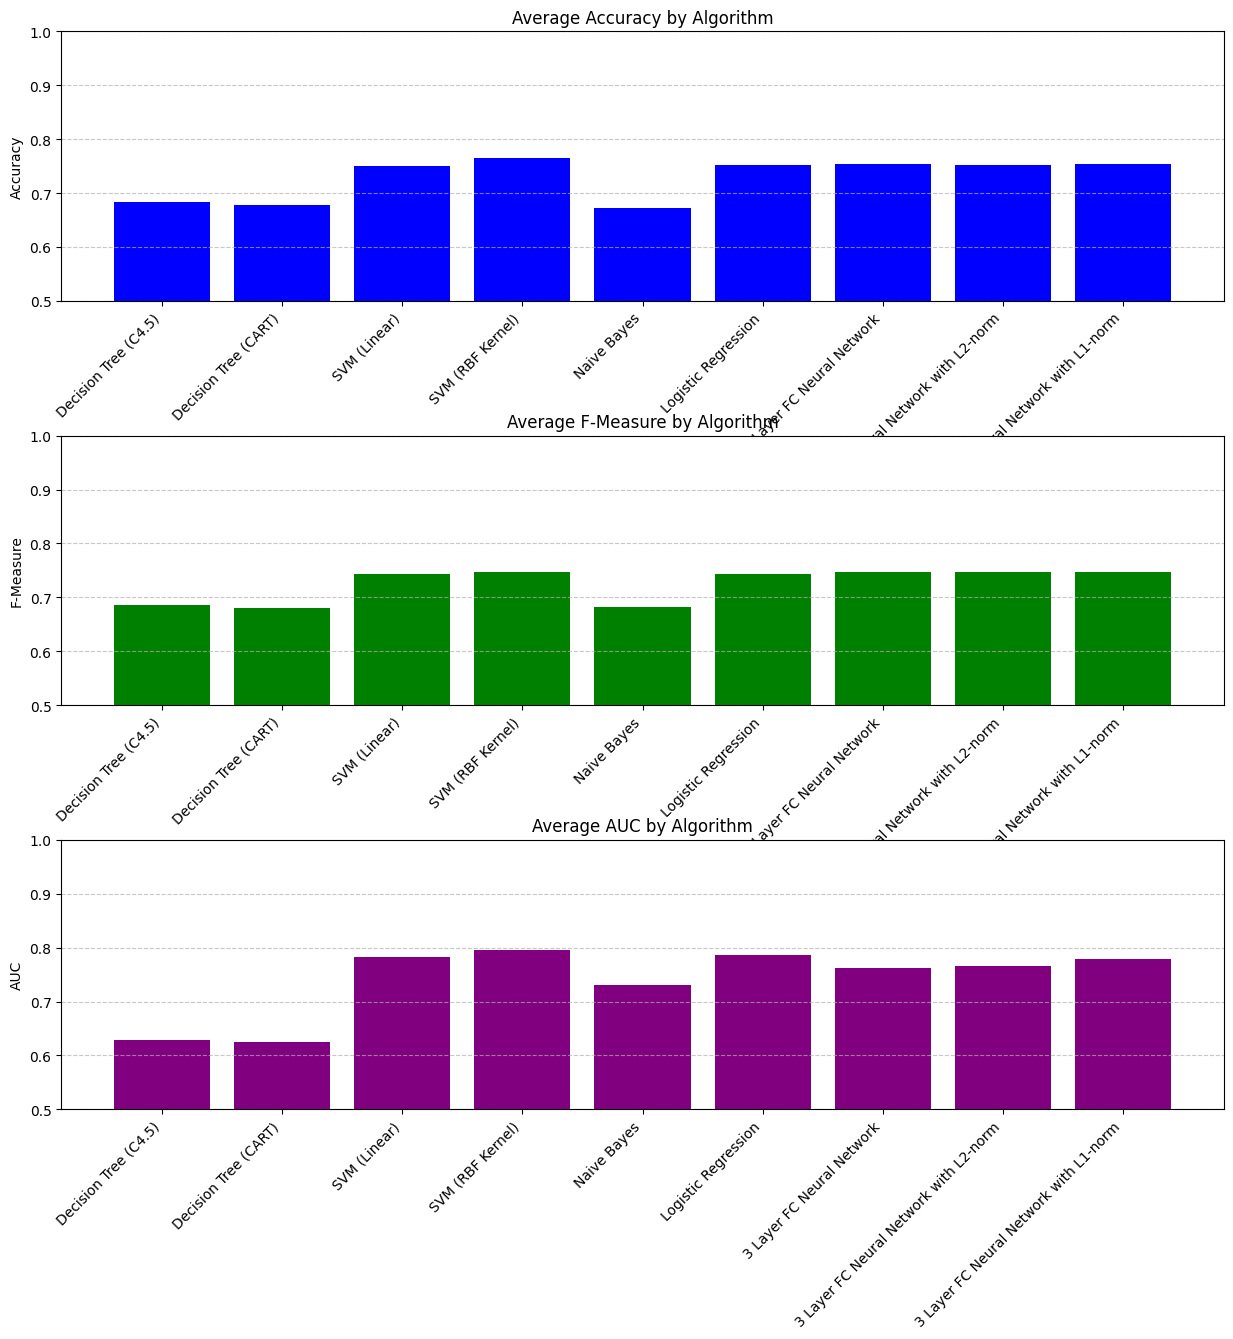

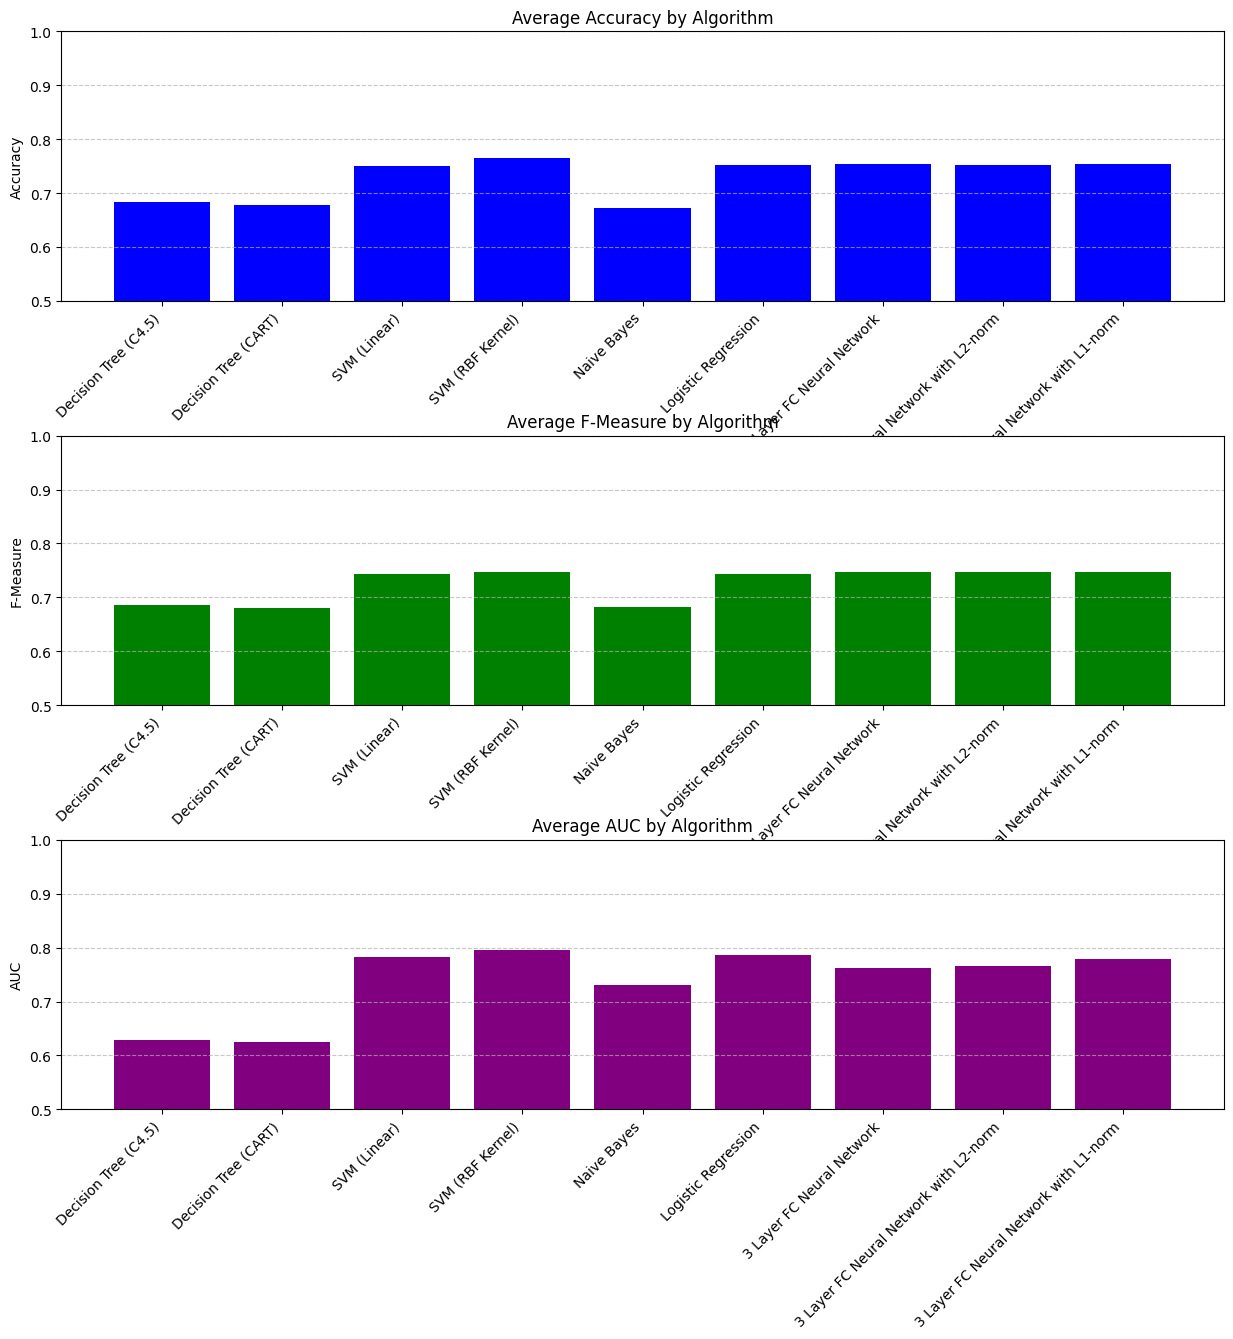

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
import time

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Load the German Credit dataset
print("Step 1: Loading the German Credit dataset from UCI")
# URL for the UCI German Credit dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

try:
    # Try to load the dataset
    # The dataset is space-delimited with no headers
    data = pd.read_csv(url, sep=' ', header=None)
    print("Dataset loaded successfully from URL.")
except Exception as e:
    print(f"Error loading from URL: {e}")
    print("Loading from alternate local path...")
    # Alternate approach: If URL fails, try a local file
    try:
        data = pd.read_csv('german.data', sep=' ', header=None)
        print("Dataset loaded successfully from local file.")
    except:
        print("Error: Unable to load the dataset. Please download it manually.")
        print("Dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)")
        raise

# Column names for the German Credit dataset
# Based on https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings', 'employment', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'present_residence', 'property', 'age',
    'other_installment_plans', 'housing', 'existing_credits',
    'job', 'num_dependents', 'telephone', 'foreign_worker', 'class'
]

data.columns = column_names

# Display dataset information
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {len(data.columns) - 1}")  # -1 for the target class
print(f"Number of samples: {len(data)}")
print(f"Class distribution:")
print(data['class'].value_counts())

# Extract features and target
X = data.drop('class', axis=1)
y = data['class']

# In this dataset, class 1 is "good" credit and class 2 is "bad" credit
# Convert to 0 and 1 for standardization
y = y.map({1: 0, 2: 1})  # 0 for good, 1 for bad

# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing")

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# For the German Credit dataset, we need to check which columns are categorical
# but stored as integers
for col in X.columns:
    if col not in categorical_cols and X[col].nunique() < 10:
        # This is likely a categorical feature stored as integer
        categorical_cols.append(col)
        if col in numerical_cols:
            numerical_cols.remove(col)

print(f"Categorical features: {len(categorical_cols)}")
print(f"Numerical features: {len(numerical_cols)}")

# Create preprocessor for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# If X_processed is a sparse matrix, convert to dense array for some algorithms
if hasattr(X_processed, "toarray"):
    X_processed = X_processed.toarray()

print(f"Shape after preprocessing: {X_processed.shape}")
print("Data has been preprocessed (standardized and encoded).")

# Step 3: Implementing 10×10 Fold Cross-Validation
print("\nStep 3: Implementing 10×10 Fold Cross-Validation")

# Define the models to evaluate
models = {
    'Decision Tree (C4.5)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Decision Tree (CART)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    '3 Layer FC Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50),
                                               random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L2-norm': MLPClassifier(hidden_layer_sizes=(100, 50),
                                                           alpha=0.01, random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L1-norm': MLPClassifier(hidden_layer_sizes=(100, 50),
                                                           alpha=0.01, solver='sgd',
                                                           nesterovs_momentum=False, random_state=42, max_iter=1000)
}

# Initialize results dictionary to store metrics
results = {model_name: {'accuracy': [], 'f1': [], 'auc': []} for model_name in models}

# Implement 10×10 Fold Cross-Validation
n_repeats = 10
n_splits = 10

start_time = time.time()

for repeat in range(n_repeats):
    print(f"\nRepeat {repeat+1}/{n_repeats}")

    # Create a new random split of the data
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

    for fold, (train_index, test_index) in enumerate(kf.split(X_processed)):
        print(f"  Processing fold {fold+1}/{n_splits}", end='\r')

        # Split data
        X_train, X_test = X_processed[train_index], X_processed[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train and evaluate each model
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # For AUC, we need probability estimates
            if hasattr(model, "predict_proba"):
                try:
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                except:
                    # Fallback for models that might fail with predict_proba
                    y_pred_proba = y_pred
            else:
                # Some models might not have predict_proba
                try:
                    y_pred_proba = model.decision_function(X_test) if hasattr(model, "decision_function") else y_pred
                except:
                    y_pred_proba = y_pred

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            try:
                auc = roc_auc_score(y_test, y_pred_proba)
            except:
                auc = 0.5  # Default if AUC calculation fails

            # Store results
            results[model_name]['accuracy'].append(accuracy)
            results[model_name]['f1'].append(f1)
            results[model_name]['auc'].append(auc)

    print(f"  Completed {n_splits} folds for repeat {repeat+1}")

end_time = time.time()
print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

# Calculate average metrics across all 10×10 = 100 folds
print("\nFinal Results:")
print("-" * 100)
print(f"{'Algorithm':<35} {'Avg Accuracy':<15}  {'Avg F-Measure':<15} {'Avg AUC':<15}")
print("-" * 100)

for model_name in models:
    avg_accuracy = np.mean(results[model_name]['accuracy'])
    avg_f1 = np.mean(results[model_name]['f1'])
    avg_auc = np.mean(results[model_name]['auc'])

    print(f"{model_name:<35}  {avg_accuracy:.4f}        {avg_f1:.4f}        {avg_auc:.4f}")

print("-" * 100)

# Create a pandas DataFrame for better visualization
results_df = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'Average Accuracy': [np.mean(results[model_name]['accuracy']) for model_name in models],
    'Average F-Measure': [np.mean(results[model_name]['f1']) for model_name in models],
    'Average AUC': [np.mean(results[model_name]['auc']) for model_name in models]
})


# Visualize the results
plt.figure(figsize=(15, 14))

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.bar(results_df['Algorithm'], results_df['Average Accuracy'], color='blue')
plt.title('Average Accuracy by Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot F-Measure
plt.subplot(3, 1, 2)
plt.bar(results_df['Algorithm'], results_df['Average F-Measure'], color='green')
plt.title('Average F-Measure by Algorithm')
plt.ylabel('F-Measure')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot AUC
plt.subplot(3, 1, 3)
plt.bar(results_df['Algorithm'], results_df['Average AUC'], color='purple')
plt.title('Average AUC by Algorithm')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add spacing between plots
plt.subplots_adjust(hspace=0.5)

# Save the plots
# Create a pandas DataFrame for better visualization
results_df = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'Average Accuracy': [np.mean(results[model_name]['accuracy']) for model_name in models],
    'Average F-Measure': [np.mean(results[model_name]['f1']) for model_name in models],
    'Average AUC': [np.mean(results[model_name]['auc']) for model_name in models]
})

# Visualize the results
plt.figure(figsize=(15, 14))

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.bar(results_df['Algorithm'], results_df['Average Accuracy'], color='blue')
plt.title('Average Accuracy by Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot F-Measure
plt.subplot(3, 1, 2)
plt.bar(results_df['Algorithm'], results_df['Average F-Measure'], color='green')
plt.title('Average F-Measure by Algorithm')
plt.ylabel('F-Measure')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot AUC
plt.subplot(3, 1, 3)
plt.bar(results_df['Algorithm'], results_df['Average AUC'], color='purple')
plt.title('Average AUC by Algorithm')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add spacing between plots
plt.subplots_adjust(hspace=0.5)

# Save the visualization
plt.show

## **Dataset 4: Student Performance**


**Application**:
- Used to **predict student academic performance** in secondary education
- Helps educators identify at-risk students and improve educational interventions
- Supports research on factors affecting student achievement

**Attributes**:
- Contains **33 features** describing student demographics, social, and school-related factors:
  - **Demographic**: age, gender, family size, parents' education/occupation
  - **Social**: alcohol consumption, travel time, romantic relationships
  - **Academic**: past failures, extra educational support, school attendance
  - **School**: school attended, class size, course type
- Includes **3 target variables** (numeric scores):
  - G1 (first period grade, 0-20)
  - G2 (second period grade, 0-20)
  - G3 (final grade, 0-20, may be transformed to binary classification)

**Number of Samples**:
- **Total of 649 instances** (students)
- Two separate datasets (math and Portuguese courses) with 395 and 649 students respectively
- Typical binary classification uses G3 ≥ 10 as passing (adjustable threshold)

**Number of Classes**:
- **Regression task** when predicting numeric scores (G1, G2, G3)
- For classification:
  - **2 classes** (common transformation):
    - Pass (e.g., G3 ≥ 10)
    - Fail (e.g., G3 < 10)
  - Can be extended to multiple classes (e.g., letter grades)

**Additional Notes**:
- Dataset combines **numeric and categorical** features
- Contains **real-world educational data** from Portuguese schools
- No missing values in the main dataset
- Commonly used for:
  - Performance prediction models
  - Educational data mining
  - Feature importance analysis (what factors most affect performance)
- Particularly useful for testing both regression and classification algorithms

Step 1: Loading the Student Performance dataset from UCI
Dataset loaded successfully from URL.
Merging Math and Portuguese datasets...
Combined dataset shape: (1044, 34)
Dataset shape: (1044, 34)
Number of features: 33
Number of samples: 1044
Class distribution (pass/fail):
pass
1    814
0    230
Name: count, dtype: int64

Step 2: Data Preprocessing
Categorical features: 18
Numerical features: 13
Shape after preprocessing: (1044, 58)
Data has been preprocessed (standardized and encoded).

Step 3: Implementing 10×10 Fold Cross-Validation

Repeat 1/10
  Completed 10 folds for repeat 1

Repeat 2/10
  Completed 10 folds for repeat 2

Repeat 3/10
  Completed 10 folds for repeat 3

Repeat 4/10
  Completed 10 folds for repeat 4

Repeat 5/10
  Completed 10 folds for repeat 5

Repeat 6/10
  Completed 10 folds for repeat 6

Repeat 7/10
  Completed 10 folds for repeat 7

Repeat 8/10
  Completed 10 folds for repeat 8

Repeat 9/10
  Completed 10 folds for repeat 9

Repeat 10/10
  Completed 10 folds

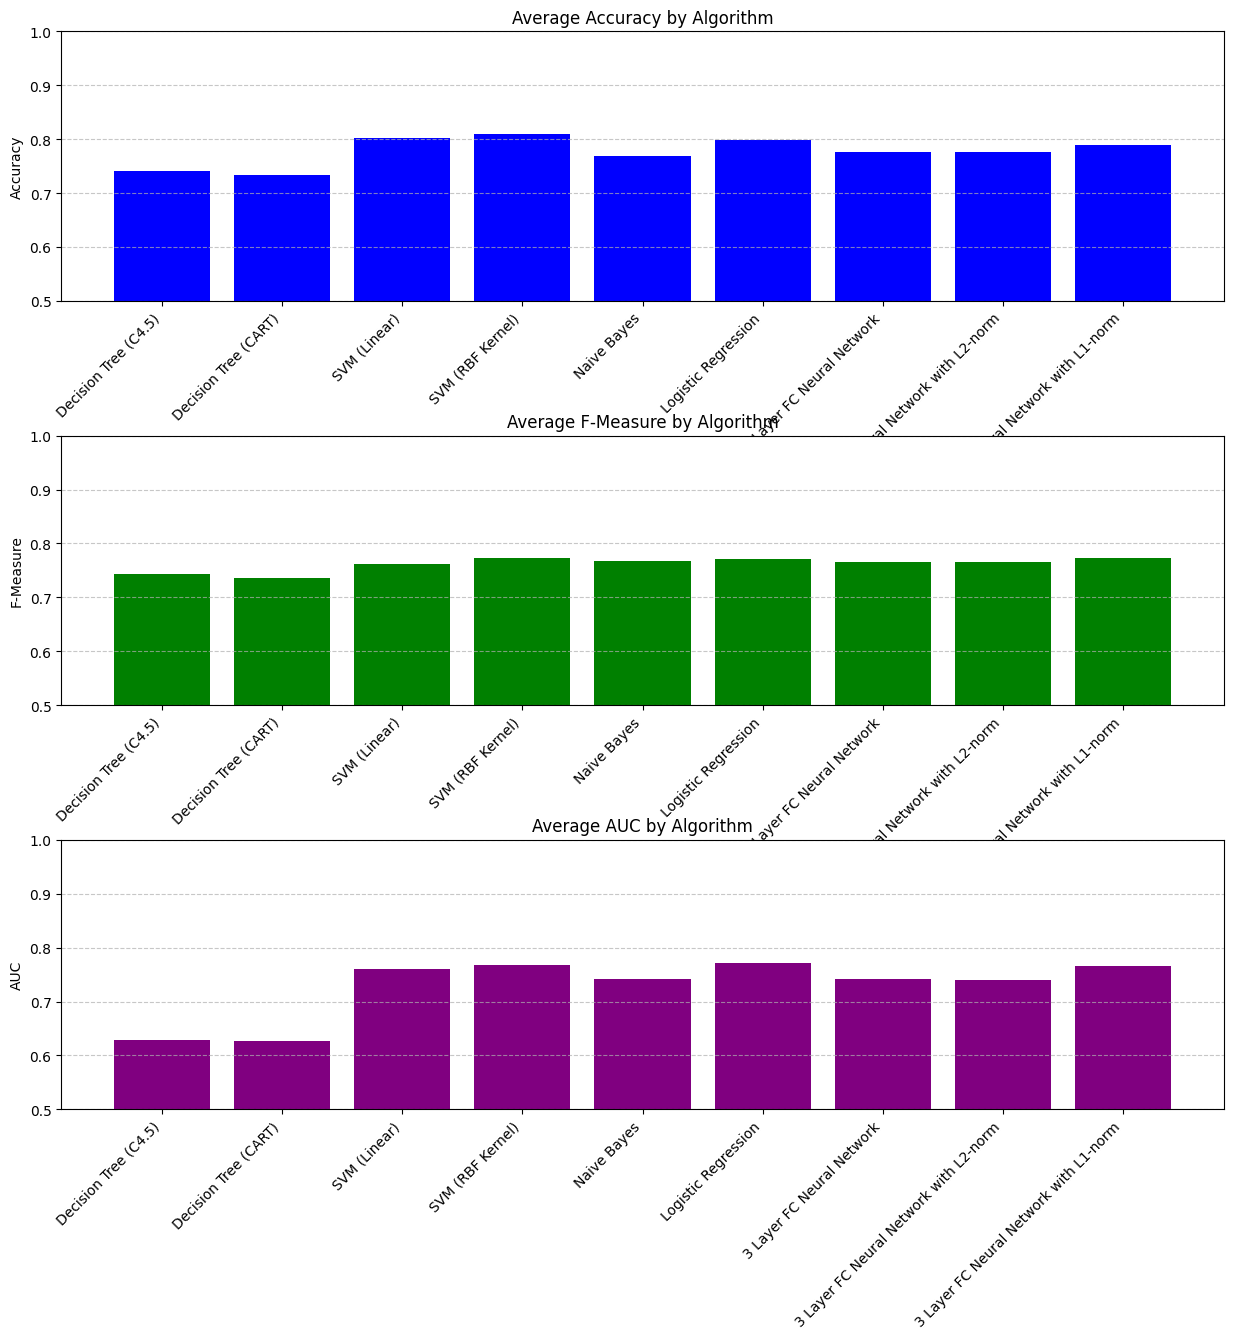

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
import time

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Load the Student Performance dataset
print("Step 1: Loading the Student Performance dataset from UCI")
# URLs for the UCI Student Performance dataset
url_math = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

try:
    # Try to load the dataset
    import io
    import requests
    import zipfile

    print("Downloading student.zip...")
    r = requests.get(url_math)
    z = zipfile.ZipFile(io.BytesIO(r.content))

    # Read both Math and Portuguese datasets
    with z.open('student-mat.csv') as f:
        math_data = pd.read_csv(f, sep=';')
    with z.open('student-por.csv') as f:
        por_data = pd.read_csv(f, sep=';')

    print("Dataset loaded successfully from URL.")

    # Merge the datasets, keeping only students who are in both datasets
    print("Merging Math and Portuguese datasets...")
    # Add subject identifiers
    math_data['subject'] = 'math'
    por_data['subject'] = 'por'

    # Combine datasets
    data = pd.concat([math_data, por_data], axis=0)

    print(f"Combined dataset shape: {data.shape}")

except Exception as e:
    print(f"Error loading from URL: {e}")
    print("Loading from alternate local paths...")
    # Alternate approach: If URL fails, try local files
    try:
        math_data = pd.read_csv('student-mat.csv', sep=';')
        por_data = pd.read_csv('student-por.csv', sep=';')

        # Add subject identifiers
        math_data['subject'] = 'math'
        por_data['subject'] = 'por'

        # Combine datasets
        data = pd.concat([math_data, por_data], axis=0)
        print("Dataset loaded successfully from local files.")
    except:
        print("Error: Unable to load the dataset. Please download it manually.")
        print("Dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance")
        raise

# Display dataset information
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {len(data.columns) - 1}")  # -1 for the target class
print(f"Number of samples: {len(data)}")

# For classification, we need to convert the final grade (G3) to categorical
# We'll use a simple approach: grade >= 10 is "pass", otherwise "fail"
# 10 is the passing grade in the Portuguese grading system (0-20)
data['pass'] = (data['G3'] >= 10).astype(int)
print("Class distribution (pass/fail):")
print(data['pass'].value_counts())

# Extract features and target
# We'll drop G1 and G2 (grades from first and second period) to make it more challenging
# Otherwise, G3 would be too easy to predict from G1 and G2
X = data.drop(['G1', 'G2', 'G3', 'pass'], axis=1)
y = data['pass']

# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing")

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {len(categorical_cols)}")
print(f"Numerical features: {len(numerical_cols)}")

# Create preprocessor for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# If X_processed is a sparse matrix, convert to dense array for some algorithms
if hasattr(X_processed, "toarray"):
    X_processed = X_processed.toarray()

print(f"Shape after preprocessing: {X_processed.shape}")
print("Data has been preprocessed (standardized and encoded).")

# Step 3: Implementing 10×10 Fold Cross-Validation
print("\nStep 3: Implementing 10×10 Fold Cross-Validation")

# Define the models to evaluate
models = {
    'Decision Tree (C4.5)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Decision Tree (CART)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    '3 Layer FC Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50),
                                               random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L2-norm': MLPClassifier(hidden_layer_sizes=(100, 50),
                                                           alpha=0.01, random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L1-norm': MLPClassifier(hidden_layer_sizes=(100, 50),
                                                           alpha=0.01, solver='sgd',
                                                           nesterovs_momentum=False, random_state=42, max_iter=1000)
}

# Initialize results dictionary to store metrics
results = {model_name: {'accuracy': [], 'f1': [], 'auc': []} for model_name in models}

# Implement 10×10 Fold Cross-Validation
n_repeats = 10
n_splits = 10

start_time = time.time()

for repeat in range(n_repeats):
    print(f"\nRepeat {repeat+1}/{n_repeats}")

    # Create a new random split of the data
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

    for fold, (train_index, test_index) in enumerate(kf.split(X_processed)):
        print(f"  Processing fold {fold+1}/{n_splits}", end='\r')

        # Split data
        X_train, X_test = X_processed[train_index], X_processed[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train and evaluate each model
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # For AUC, we need probability estimates
            if hasattr(model, "predict_proba"):
                try:
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                except:
                    # Fallback for models that might fail with predict_proba
                    y_pred_proba = y_pred
            else:
                # Some models might not have predict_proba
                try:
                    y_pred_proba = model.decision_function(X_test) if hasattr(model, "decision_function") else y_pred
                except:
                    y_pred_proba = y_pred

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            try:
                auc = roc_auc_score(y_test, y_pred_proba)
            except:
                auc = 0.5  # Default if AUC calculation fails

            # Store results
            results[model_name]['accuracy'].append(accuracy)
            results[model_name]['f1'].append(f1)
            results[model_name]['auc'].append(auc)

    print(f"  Completed {n_splits} folds for repeat {repeat+1}")

end_time = time.time()
print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

# Calculate average metrics across all 10×10 = 100 folds
print("\nFinal Results:")
print("-" * 100)
print(f"{'Algorithm':<35} {'Avg Accuracy':<15} {'Avg F-Measure':<15} {'Avg AUC':<15}")
print("-" * 100)

for model_name in models:
    avg_accuracy = np.mean(results[model_name]['accuracy'])
    avg_f1 = np.mean(results[model_name]['f1'])
    avg_auc = np.mean(results[model_name]['auc'])

    print(f"{model_name:<35} {avg_accuracy:.4f}        {avg_f1:.4f}        {avg_auc:.4f}")

print("-" * 100)


# Create a pandas DataFrame for better visualization
results_df = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'Average Accuracy': [np.mean(results[model_name]['accuracy']) for model_name in models],
    'Average F-Measure': [np.mean(results[model_name]['f1']) for model_name in models],
    'Average AUC': [np.mean(results[model_name]['auc']) for model_name in models]
})


# Visualize the results
plt.figure(figsize=(15, 14))

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.bar(results_df['Algorithm'], results_df['Average Accuracy'], color='blue')
plt.title('Average Accuracy by Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot F-Measure
plt.subplot(3, 1, 2)
plt.bar(results_df['Algorithm'], results_df['Average F-Measure'], color='green')
plt.title('Average F-Measure by Algorithm')
plt.ylabel('F-Measure')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot AUC
plt.subplot(3, 1, 3)
plt.bar(results_df['Algorithm'], results_df['Average AUC'], color='purple')
plt.title('Average AUC by Algorithm')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplots_adjust(hspace=0.5)
plt.show()


## **Dataset 5: Spambase**

**Application**:
- Used for **binary classification** to detect email spam vs. legitimate emails (ham)
- Helps build email filtering systems and spam detection algorithms
- Supports research in text classification and email security

**Attributes**:
- Contains **57 features** derived from email content analysis:
  - **48 word frequency features**: Percentage of words matching specific keywords (e.g., "free", "money")
  - **6 character frequency features**: Percentage of characters matching patterns (e.g., '!', '$')
  - **3 structural features**: Average/median/longest uninterrupted sequences of capital letters
  - **1 target feature**: Spam (1) or non-spam (0)
- All features are **continuous numeric** values (percentages or counts)

**Number of Samples**:
- **Total of 4,601 instances** (emails)
- **1,813 spam emails (39.4%)**
- **2,788 non-spam emails (60.6%)**

**Number of Classes**:
- **2 classes**:
  - **Spam (Class 1)** - Unwanted commercial email
  - **Non-spam (Class 0)** - Legitimate email

**Additional Notes**:
- Dataset is **completely numeric** (no categorical features)
- No missing values present
- Features represent word/character statistics rather than raw text
- Particularly useful for:
  - Testing classification algorithms (SVM, Naive Bayes, Neural Networks)
  - Feature selection studies (identifying most important spam indicators)
  - Benchmarking spam detection systems
- Created by Hewlett-Packard Labs from their postmaster data


Step 1: Loading the Spambase dataset
Dataset shape: (4601, 57)
Number of features: 57
Number of classes: 2
Class distribution: [2788 1813]

Step 2: Data Preprocessing
Data has been scaled using StandardScaler

Step 3: Implementing 10×10 Fold Cross-Validation

Repeat 1/10
  Completed 10 folds for repeat 1

Repeat 2/10
  Completed 10 folds for repeat 2

Repeat 3/10
  Completed 10 folds for repeat 3

Repeat 4/10
  Completed 10 folds for repeat 4

Repeat 5/10
  Completed 10 folds for repeat 5

Repeat 6/10
  Completed 10 folds for repeat 6

Repeat 7/10
  Completed 10 folds for repeat 7

Repeat 8/10
  Completed 10 folds for repeat 8

Repeat 9/10
  Completed 10 folds for repeat 9

Repeat 10/10
  Completed 10 folds for repeat 10

Total execution time: 5822.72 seconds

Final Results:
----------------------------------------------------------------------------------------------------
Algorithm                           Avg Accuracy    Avg F-Measure   Avg AUC        
-----------------------------

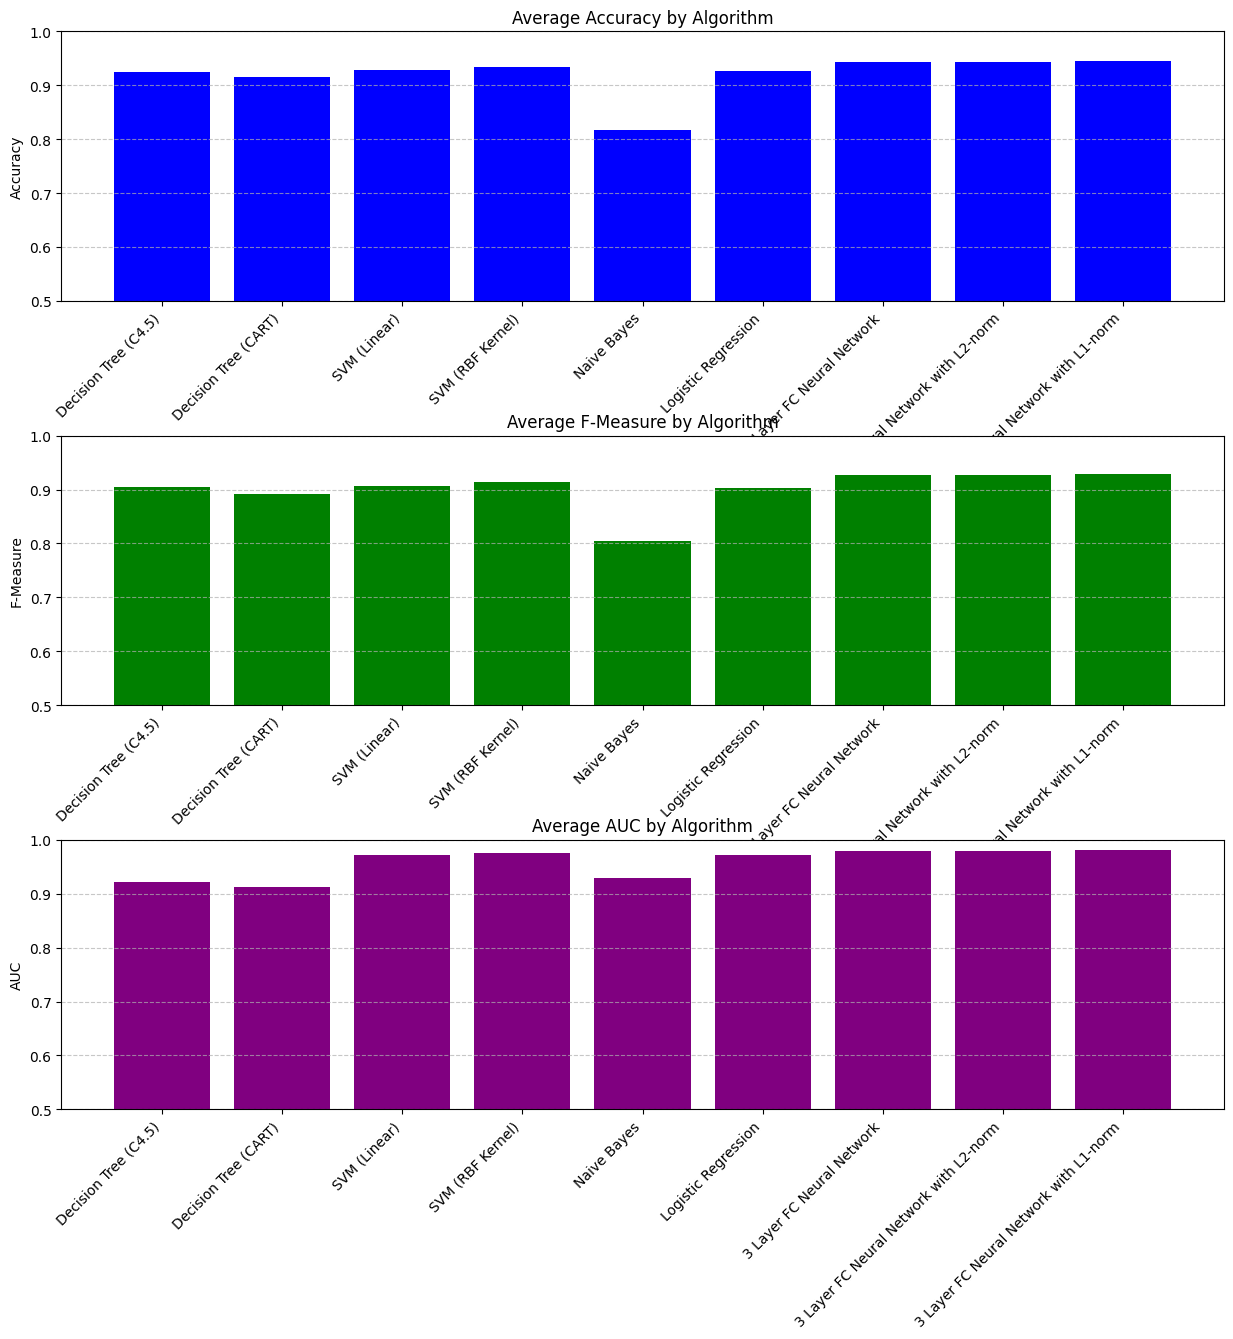

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
import time
import urllib.request
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Load the Spambase dataset
print("Step 1: Loading the Spambase dataset")

# Download the dataset if not already present
if not os.path.exists('spambase.data'):
    print("Downloading dataset...")
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
    urllib.request.urlretrieve(url, 'spambase.data')

# Load the dataset
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'spam'
]

data = pd.read_csv('spambase.data', header=None, names=column_names)

# Split into features and target
X = data.drop('spam', axis=1).values
y = data['spam'].values

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing")
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data has been scaled using StandardScaler")

# Step 3: Implementing 10×10 Fold Cross-Validation
print("\nStep 3: Implementing 10×10 Fold Cross-Validation")

# Define the models to evaluate
models = {
    'Decision Tree (C4.5)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Decision Tree (CART)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    '3 Layer FC Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.0001,
                                              random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L2-norm': MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01,
                                                          random_state=42, max_iter=1000),
    '3 Layer FC Neural Network with L1-norm': MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01,
                                                          solver='sgd', random_state=42, max_iter=1000,
                                                          nesterovs_momentum=False)
}

# Initialize results dictionary to store metrics
results = {model_name: {'accuracy': [], 'f1': [], 'auc': []} for model_name in models}

# Implement 10×10 Fold Cross-Validation
n_repeats = 10
n_splits = 10

start_time = time.time()

for repeat in range(n_repeats):
    print(f"\nRepeat {repeat+1}/{n_repeats}")

    # Create a new random split of the data
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

    for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
        print(f"  Processing fold {fold+1}/{n_splits}", end='\r')

        # Split data
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train and evaluate each model
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # For AUC, we need probability estimates
            if hasattr(model, "predict_proba"):
                try:
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                except:
                    # Fallback for models that might fail with predict_proba
                    y_pred_proba = y_pred
            else:
                # Some models might not have predict_proba
                try:
                    y_pred_proba = model.decision_function(X_test) if hasattr(model, "decision_function") else y_pred
                except:
                    y_pred_proba = y_pred

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            try:
                auc = roc_auc_score(y_test, y_pred_proba)
            except:
                auc = 0.5  # Default if AUC calculation fails

            # Store results
            results[model_name]['accuracy'].append(accuracy)
            results[model_name]['f1'].append(f1)
            results[model_name]['auc'].append(auc)

    print(f"  Completed {n_splits} folds for repeat {repeat+1}")

end_time = time.time()
print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

# Calculate average metrics across all 10×10 = 100 folds
print("\nFinal Results:")
print("-" * 100)
print(f"{'Algorithm':<35} {'Avg Accuracy':<15} {'Avg F-Measure':<15} {'Avg AUC':<15}")
print("-" * 100)

for model_name in models:
    avg_accuracy = np.mean(results[model_name]['accuracy'])
    avg_f1 = np.mean(results[model_name]['f1'])
    avg_auc = np.mean(results[model_name]['auc'])

    print(f"{model_name:<35} {avg_accuracy:.4f}        {avg_f1:.4f}        {avg_auc:.4f}")

print("-" * 100)

# Create a pandas DataFrame for better visualization
results_df = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'Average Accuracy': [np.mean(results[model_name]['accuracy']) for model_name in models],
    'Average F-Measure': [np.mean(results[model_name]['f1']) for model_name in models],
    'Average AUC': [np.mean(results[model_name]['auc']) for model_name in models]
})


# Visualize the results
plt.figure(figsize=(15, 14))

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.bar(results_df['Algorithm'], results_df['Average Accuracy'], color='blue')
plt.title('Average Accuracy by Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot F-Measure
plt.subplot(3, 1, 2)
plt.bar(results_df['Algorithm'], results_df['Average F-Measure'], color='green')
plt.title('Average F-Measure by Algorithm')
plt.ylabel('F-Measure')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot AUC
plt.subplot(3, 1, 3)
plt.bar(results_df['Algorithm'], results_df['Average AUC'], color='purple')
plt.title('Average AUC by Algorithm')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()